데이터 불러오기

In [18]:
import sys
print(sys.executable)

/usr/local/bin/python3


In [19]:
import sys
!{sys.executable} -m pip install pandas seaborn


[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: pip3 install --upgrade pip


데이터 살펴보기

In [20]:
import re 
import pandas as pd
#import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
plt.rc('font', family='NanumMyeongjo')

In [21]:
user_colums = ['user_id', 'gender', 'age', 'occupation', 'zip']
rating_columns = ['user_id', 'movie_id', 'rating', 'timestamp']
movie_columns = ['movie_id', 'title', 'genres']

In [22]:
data_path = "/Users/vanilla/Desktop/MQ8_DL/autoint"

In [23]:
users = pd.read_csv(f'{data_path}/users.dat', sep='::', header=None, names=user_colums, engine='python')
ratings = pd.read_csv(f'{data_path}/ratings.dat', sep='::', header=None, names=rating_columns, engine='python')
movies = pd.read_csv(f'{data_path}/movies.dat', sep='::', header=None, names=movie_columns, engine='python', encoding='latin-1')

1. 데이터 users: user 정보  
user_id: 1부터 6040으로, 익명의 정보로 되어 있음  
gender: M or F  
age: 18세 이하는 1, 18 ~ 24세는 18, 25 ~ 34는 25 등과 같이 구성되어 있음  
occupation: 2는 artist, 8은 farmer 등으로 숫자값으로 매핑되어 있음  

In [24]:
print(users.shape)
users.head()

(6040, 5)


,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


2. 데이터 ratings: rating 정보  
user_id: 1부터 6040으로, 익명의 정보로 되어 있음  
movie_id: 1부터 3952로, 익명의 정보로 되어 있음  
rating: 5점 평점  
timestamp: Unix timestamp로 되어 있음.  

In [25]:
print(ratings.shape)
ratings.head()

(1000209, 4)


,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


3. 데이터 movies: movie 정보  
movie_id : 1부터 3952로, 익명의 정보로 되어 있음  
title: 영화 제목과 연도가 함께 입력되어 있음  
genres: Action, Comedy 등의 장르가 입력되어 있음  

In [26]:
print(movies.shape)
movies.head()

(3883, 3)


,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


데이터분석
1. 장르별 영화 수
2. 연도별 영화 수
3. 평점 분포
4. 장르별 평점

In [27]:
movies['year'] = movies['title'].str.extract(r'\((\d{4})\)')

In [28]:
movies.head()

,movie_id,title,genres,year
0,1,Toy Story (1995),Animation|Children's|Comedy,1995
1,2,Jumanji (1995),Adventure|Children's|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama,1995
4,5,Father of the Bride Part II (1995),Comedy,1995


In [29]:
movies['genres_split'] = movies['genres'].apply(lambda x: x.split('|'))
movies_exploded = movies.explode('genres_split')
movies_exploded.head(10)

,movie_id,title,genres,year,genres_split
0,1,Toy Story (1995),Animation|Children's|Comedy,1995,Animation
0,1,Toy Story (1995),Animation|Children's|Comedy,1995,Children's
0,1,Toy Story (1995),Animation|Children's|Comedy,1995,Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy,1995,Adventure
1,2,Jumanji (1995),Adventure|Children's|Fantasy,1995,Children's
1,2,Jumanji (1995),Adventure|Children's|Fantasy,1995,Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance,1995,Comedy
2,3,Grumpier Old Men (1995),Comedy|Romance,1995,Romance
3,4,Waiting to Exhale (1995),Comedy|Drama,1995,Comedy
3,4,Waiting to Exhale (1995),Comedy|Drama,1995,Drama


장르별 영화 개수
- x축: 장르
- y축: 개수

In [32]:
import sys
!{sys.executable} -m pip install plotly


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 4.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 376.9/376.9 kB 5.8 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: pip3 install --upgrade pip


In [33]:
import plotly.express as px
px.histogram(movies_exploded, x='genres_split', height=450, title='장르별 영화 수').update_xaxes(categoryorder="total descending")

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'bingroup': 'x',
              'hovertemplate': 'genres_split=%{x}<br>count=%{y}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': '#636efa', 'pattern': {'shape': ''}},
              'name': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'histogram',
              'x': array(['Animation', "Children's", 'Comedy', ..., 'Drama', 'Drama', 'Thriller'],
                         shape=(6408,), dtype=object),
              'xaxis': 'x',
              'yaxis': 'y'}],
    'layout': {'barmode': 'relative',
               'height': 450,
               'legend': {'tracegroupgap': 0},
               'template': '...',
               'title': {'text': '장르별 영화 수'},
               'xaxis': {'anchor': 'y',
                         'categoryorder': 'total descending',
                         'domain': [0.0, 1.0],
                         'title': {'text': 'genres_split'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'count'}}}
})

findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
/Users/vanilla/Library/Python/3.10/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning:

Glyph 51109 (\N{HANGUL SYLLABLE JANG}) missing from font(s) DejaVu Sans.

/Users/vanilla/Library/Python/3.10/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning:

Glyph 47476 (\N{HANGUL SYLLABLE REU}) missing from font(s) DejaVu Sans.

/Use

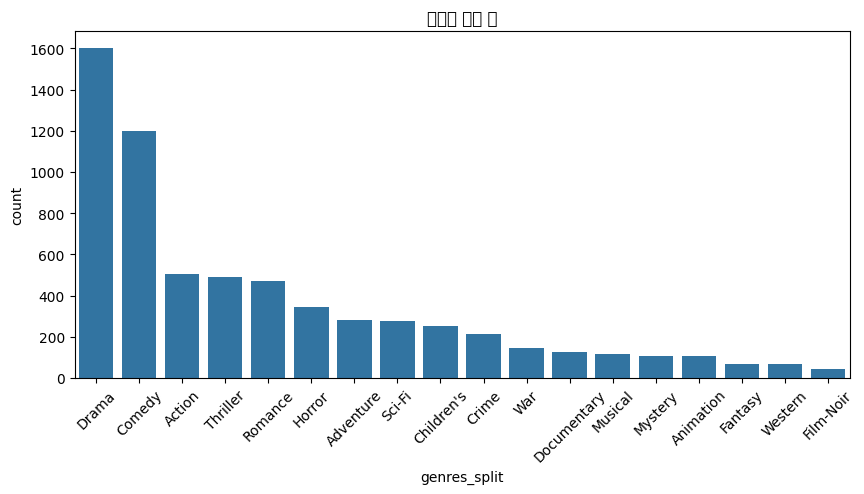

In [34]:
sns.countplot(x='genres_split', data=movies_exploded, order = movies_exploded['genres_split'].value_counts().index)

plt.gcf().set_size_inches(10, 4.5)
plt.title('장르별 영화 수')
plt.xticks(rotation=45)
plt.show()

연도별 영화 개수
- x축: 연도
- y축: 영화의 개수

In [35]:
movie_count_by_year = px.histogram(movies, x='year', height=450, title='연도별 영화 수').update_xaxes(categoryorder="total descending")
movie_count_by_year

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'bingroup': 'x',
              'hovertemplate': 'year=%{x}<br>count=%{y}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': '#636efa', 'pattern': {'shape': ''}},
              'name': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'histogram',
              'x': array(['1995', '1995', '1995', ..., '2000', '2000', '2000'],
                         shape=(3883,), dtype=object),
              'xaxis': 'x',
              'yaxis': 'y'}],
    'layout': {'barmode': 'relative',
               'height': 450,
               'legend': {'tracegroupgap': 0},
               'template': '...',
               'title': {'text': '연도별 영화 수'},
               'xaxis': {'anchor': 'y',
                         'categoryorder': 'total descending',
                         'domain': [0.0, 1.0],
                         'title': {'text': 'year'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'count'}}}
})

findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
/Users/vanilla/Library/Python/3.10/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning:

Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from font(s) DejaVu Sans.

/Users/vanilla/Library/Python/3.10/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning:

Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.

/Users/vanilla/Library/Python/3.10/lib/python/site-pac

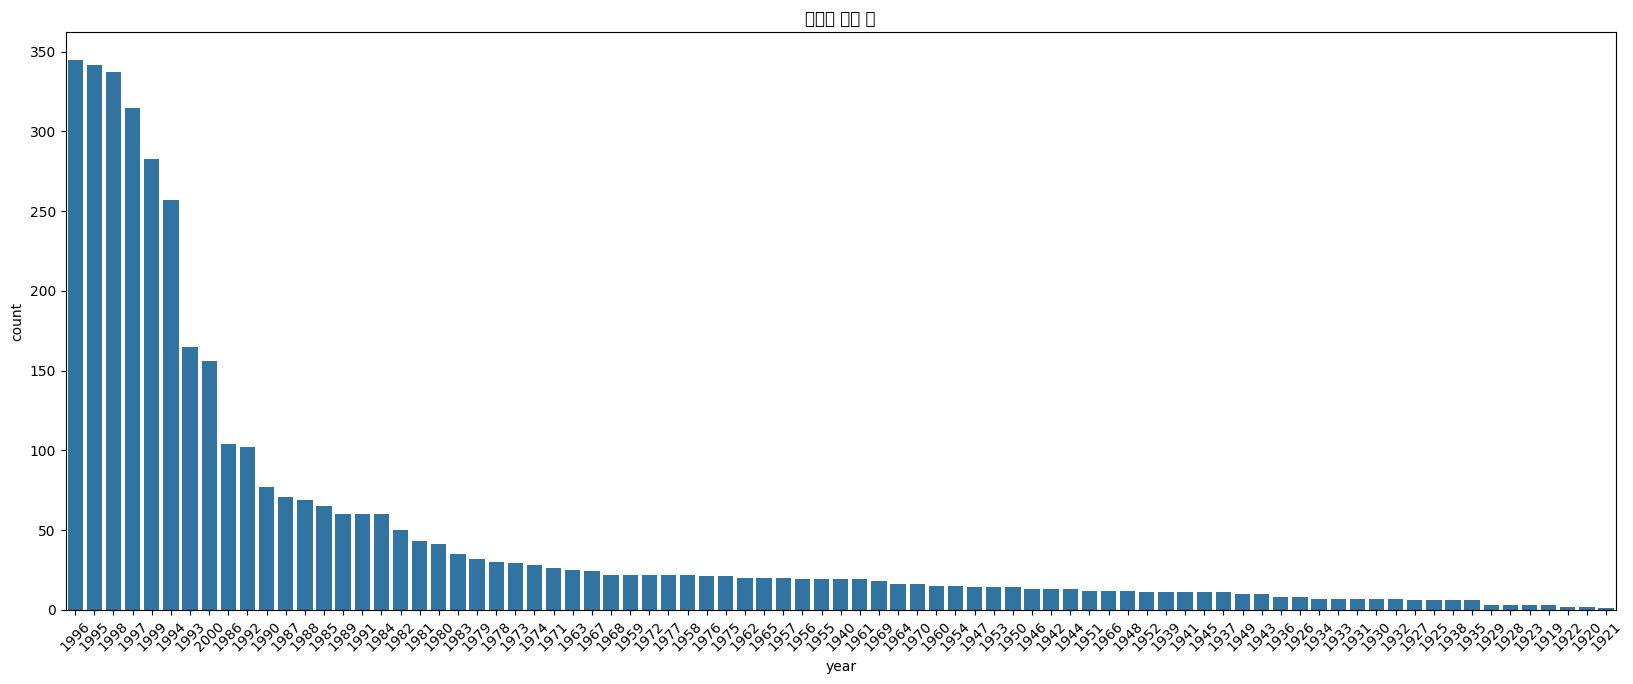

In [36]:
year_counts = movies['year'].value_counts().reset_index()
year_counts.columns = ['year', 'count']

year_counts = year_counts.sort_values('count', ascending=False)

sns.barplot(x='year', y='count', data=year_counts)

plt.gcf().set_size_inches(20, 7.5)
plt.title('연도별 영화 수')
plt.xticks(rotation=45)
plt.show()

2. 평점 데이터(ratings)

In [37]:
mv_rating_agg = pd.DataFrame(ratings.groupby('movie_id')['rating'].mean())
mv_rating_agg['num_of_ratings'] = pd.DataFrame(ratings.groupby('movie_id')['rating'].count())
mv_rating_agg = mv_rating_agg.reset_index()
mv_rating_agg.columns = ['movie_id', 'avg_rating', 'num_of_ratings']
mv_rating_agg

,movie_id,avg_rating,num_of_ratings
0,1,4.146846,2077
1,2,3.201141,701
2,3,3.016736,478
3,4,2.729412,170
4,5,3.006757,296
...,...,...,...
3701,3948,3.635731,862
3702,3949,4.115132,304
3703,3950,3.666667,54
3704,3951,3.900000,40


평점 분포
- x축: 평균 평점
- y축: 개수

In [38]:
px.histogram(mv_rating_agg, x='avg_rating', height=450, title='평점 분포')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'bingroup': 'x',
              'hovertemplate': 'avg_rating=%{x}<br>count=%{y}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': '#636efa', 'pattern': {'shape': ''}},
              'name': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'histogram',
              'x': {'bdata': ('KyD3516WEEB4g3ju75sJQGC6zrFGIg' ... 'VVVVUNQDMzMzMzMw9A6KjAF1c/DkA='),
                    'dtype': 'f8'},
              'xaxis': 'x',
              'yaxis': 'y'}],
    'layout': {'barmode': 'relative',
               'height': 450,
               'legend': {'tracegroupgap': 0},
               'template': '...',
               'title': {'text': '평점 분포'},
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'avg_rating'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'count'}}}
})

findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
/Users/vanilla/Library/Python/3.10/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning:

Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from font(s) DejaVu Sans.

/Users/vanilla/Library/Python/3.10/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning:

Glyph 51216 (\N{HANGUL SYLLABLE JEOM}) missing from font(s) DejaVu Sans.

/Users/vanilla/Library/Python/3.10/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning:

Glyph 48516 (\N{HANGUL SYLLABLE BUN}) miss

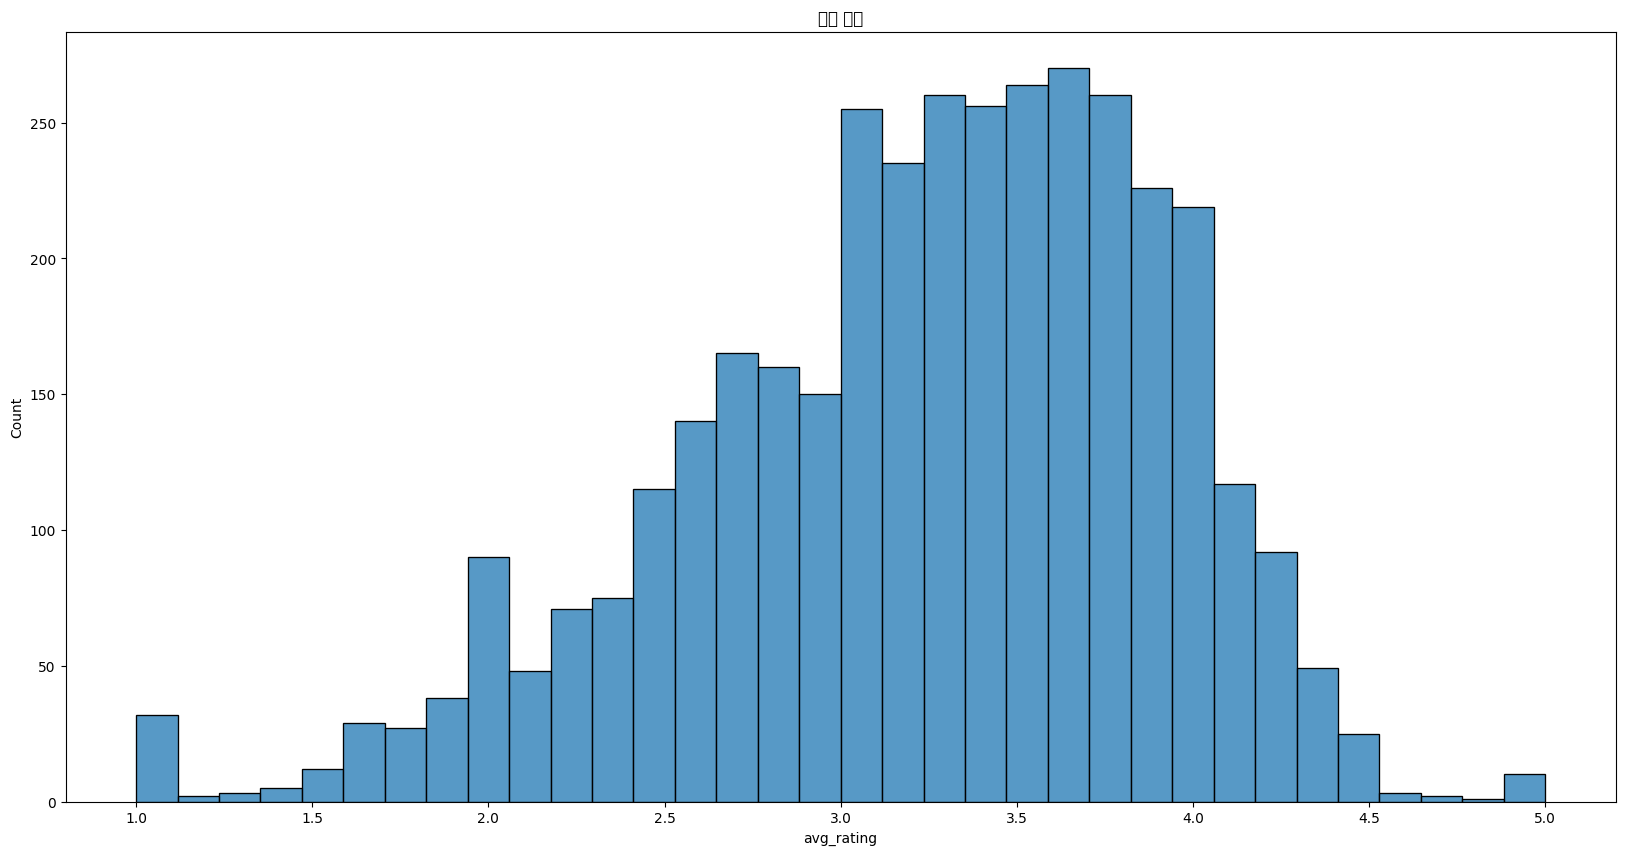

In [39]:
sns.histplot(mv_rating_agg['avg_rating'], kde=False)
plt.gcf().set_size_inches(20, 10)
plt.title('평점 분포')
plt.show()

3. 장르별 평점 분포

In [40]:
movies_exploded.head()

,movie_id,title,genres,year,genres_split
0,1,Toy Story (1995),Animation|Children's|Comedy,1995,Animation
0,1,Toy Story (1995),Animation|Children's|Comedy,1995,Children's
0,1,Toy Story (1995),Animation|Children's|Comedy,1995,Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy,1995,Adventure
1,2,Jumanji (1995),Adventure|Children's|Fantasy,1995,Children's


1. 영화 평점 데이터와 영화 데이터를 합쳐준다.  
2. genre_split를 기준으로 groupby한다.  
3. groupby할 때 rating을 기준으로 평균(mean)과 개수(count)를 뽑아낸다.  
4. rating과 mean을 기준으로 정렬한다.

In [41]:
rating_by_genre_df = pd.merge(ratings[['movie_id', 'rating']] ,movies_exploded[['movie_id', 'genres_split']] ,on='movie_id').groupby('genres_split').agg({'rating': ['mean', 'count']}).sort_values(('rating', 'mean')).reset_index()
rating_by_genre_df

genres_split    rating        
                     mean   count
0        Horror  3.215013   76386
1    Children's  3.422035   72186
2       Fantasy  3.447371   36301
3        Sci-Fi  3.466521  157294
4     Adventure  3.477257  133953
5        Action  3.491185  257457
6        Comedy  3.522099  356580
7      Thriller  3.570466  189680
8       Romance  3.607465  147523
9       Western  3.637770   20683
10      Musical  3.665519   41533
11      Mystery  3.668102   40178
12    Animation  3.684868   43293
13        Crime  3.708679   79541
14        Drama  3.766332  354529
15          War  3.893327   68527
16  Documentary  3.933123    7910
17    Film-Noir  4.075188   18261

In [42]:
rating_by_genre_df.columns

MultiIndex([('genres_split',      ''),
            (      'rating',  'mean'),
            (      'rating', 'count')],
           )

In [43]:
for col in rating_by_genre_df.columns.values:
    if col[0] == 'rating':
        print('_'.join(col).strip())
    else:
        print(col[0])

genres_split
rating_mean
rating_count


In [44]:
rating_by_genre_df.columns = ['_'.join(col).strip() if col[1] != '' else col[0] for col in rating_by_genre_df.columns.values]    
rating_by_genre_df

,genres_split,rating_mean,rating_count
0,Horror,3.215013,76386
1,Children's,3.422035,72186
2,Fantasy,3.447371,36301
3,Sci-Fi,3.466521,157294
4,Adventure,3.477257,133953
5,Action,3.491185,257457
6,Comedy,3.522099,356580
7,Thriller,3.570466,189680
8,Romance,3.607465,147523
9,Western,3.637770,20683


- x축: 장르
- y축: 평균 평점

In [45]:
px.bar(rating_by_genre_df, x='genres_split', y='rating_mean', height=350, title='장르별 평점').update_xaxes(categoryorder="total descending")

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'genres_split=%{x}<br>rating_mean=%{y}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': '#636efa', 'pattern': {'shape': ''}},
              'name': '',
              'orientation': 'v',
              'showlegend': False,
              'textposition': 'auto',
              'type': 'bar',
              'x': array(['Horror', "Children's", 'Fantasy', 'Sci-Fi', 'Adventure', 'Action',
                          'Comedy', 'Thriller', 'Romance', 'Western', 'Musical', 'Mystery',
                          'Animation', 'Crime', 'Drama', 'War', 'Documentary', 'Film-Noir'],
                         dtype=object),
              'xaxis': 'x',
              'y': {'bdata': ('zoMw2li4CUBalWvAU2ALQCH98gg3lA' ... 'xxeoglD0C1uUn/CHcPQAzenff9TBBA'),
                    'dtype': 'f8'},
              'yaxis': 'y'}],
    'layout': {'barmode': 'relative',
               'height': 350,
               'legend': {'tracegroupgap': 0},
               'template': '...',
               'title': {'text': '장르별 평점'},
               'xaxis': {'anchor': 'y',
                         'categoryorder': 'total descending',
                         'domain': [0.0, 1.0],
                         'title': {'text': 'genres_split'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'rating_mean'}}}
})

findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
/Users/vanilla/Library/Python/3.10/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning:

Glyph 51109 (\N{HANGUL SYLLABLE JANG}) missing from font(s) DejaVu Sans.

/Users/vanilla/Library/Python/3.10/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning:

Glyph 47476 (\N{HANGUL SYLLABLE REU}) missing from font(s) DejaVu Sans.

/Use

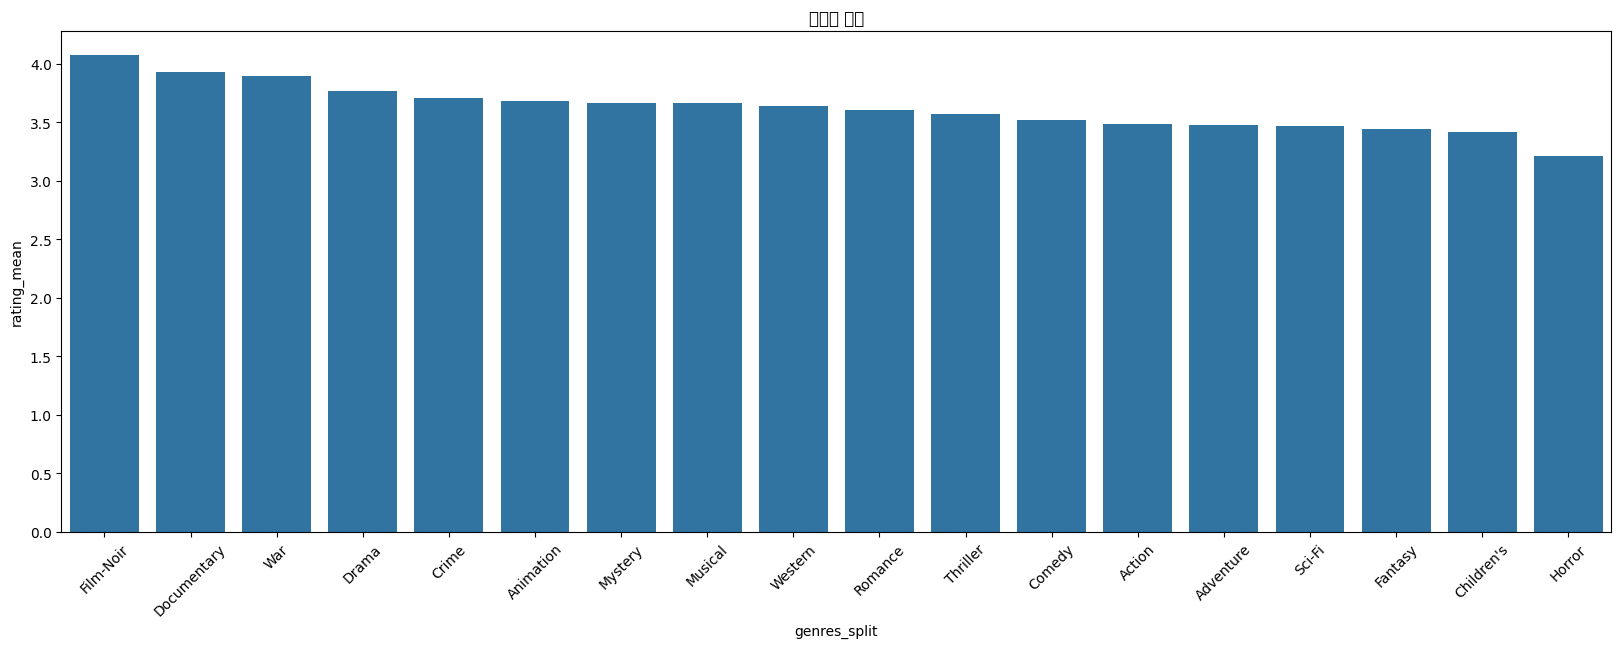

In [46]:
rating_by_genre_df_sorted_by_mean = rating_by_genre_df.sort_values('rating_mean', ascending=False)

plt.figure(figsize=(20, 6.5))
sns.barplot(x='genres_split', y='rating_mean', data=rating_by_genre_df_sorted_by_mean)
plt.title('장르별 평점')
plt.xticks(rotation=45)
plt.show()

- x축: 장르
- y축: 평가 개수

In [47]:
px.bar(rating_by_genre_df, x='genres_split', y='rating_count', height=350, title='장르별 평가 개수').update_xaxes(categoryorder="total descending")

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'genres_split=%{x}<br>rating_count=%{y}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': '#636efa', 'pattern': {'shape': ''}},
              'name': '',
              'orientation': 'v',
              'showlegend': False,
              'textposition': 'auto',
              'type': 'bar',
              'x': array(['Horror', "Children's", 'Fantasy', 'Sci-Fi', 'Adventure', 'Action',
                          'Comedy', 'Thriller', 'Romance', 'Western', 'Musical', 'Mystery',
                          'Animation', 'Crime', 'Drama', 'War', 'Documentary', 'Film-Noir'],
                         dtype=object),
              'xaxis': 'x',
              'y': {'bdata': ('YioBAPoZAQDNjQAAbmYCAEELAgCx7Q' ... 'kAALU2AQDhaAUArwsBAOYeAABVRwAA'),
                    'dtype': 'i4'},
              'yaxis': 'y'}],
    'layout': {'barmode': 'relative',
               'height': 350,
               'legend': {'tracegroupgap': 0},
               'template': '...',
               'title': {'text': '장르별 평가 개수'},
               'xaxis': {'anchor': 'y',
                         'categoryorder': 'total descending',
                         'domain': [0.0, 1.0],
                         'title': {'text': 'genres_split'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'rating_count'}}}
})

findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
/Users/vanilla/Library/Python/3.10/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning:

Glyph 51109 (\N{HANGUL SYLLABLE JANG}) missing from font(s) DejaVu Sans.

/Users/vanilla/Library/Python/3.10/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning:

Glyph 47476 (\N{HANGUL SYLLABLE REU}) missing from font(s) DejaVu Sans.

/Users/vanilla/Library/Python/3.10/lib/python/site-pa

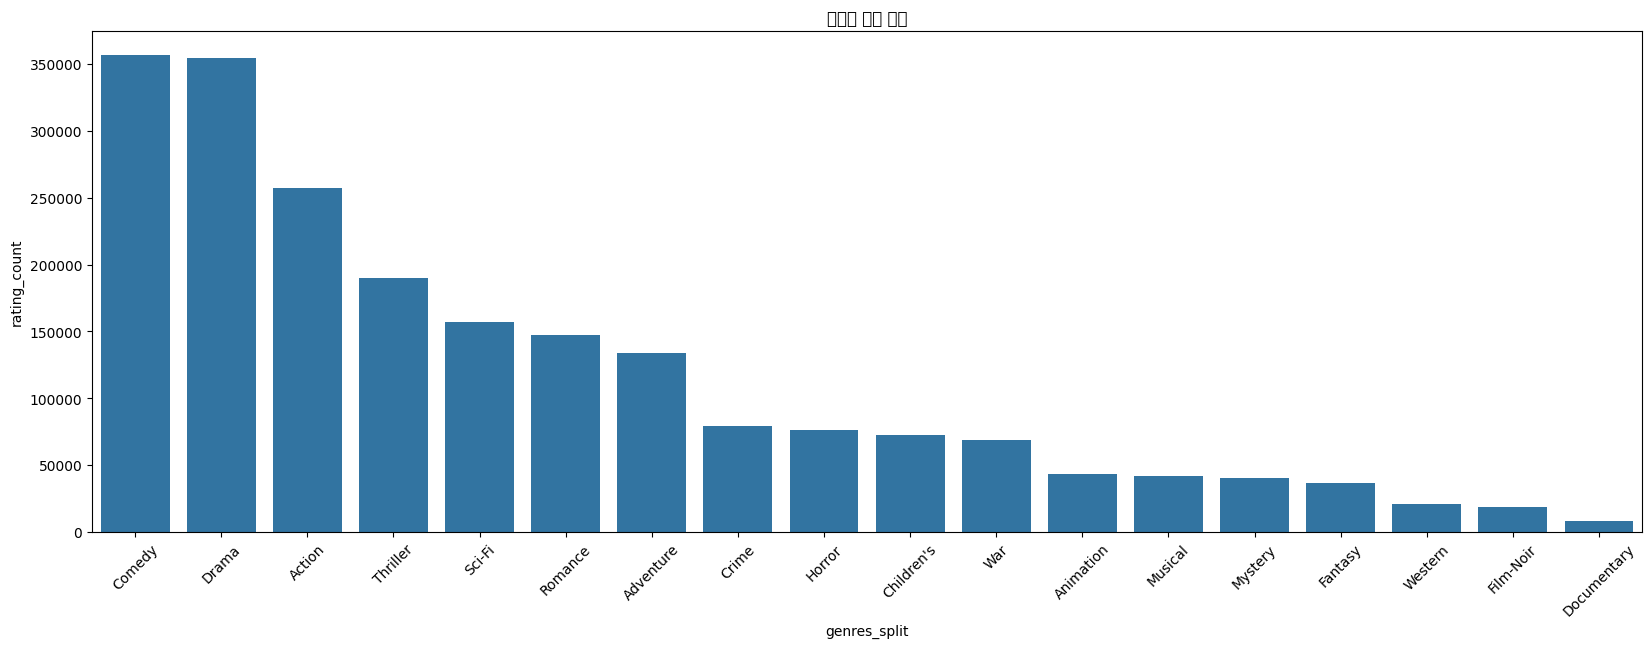

In [48]:
rating_by_genre_df_sorted_by_count = rating_by_genre_df.sort_values('rating_count', ascending=False)

plt.figure(figsize=(20, 6.5))
sns.barplot(x='genres_split', y='rating_count', data=rating_by_genre_df_sorted_by_count)
plt.title('장르별 평가 개수')
plt.xticks(rotation=45)
plt.show()

데이터 분석 마무리

In [49]:
# Occupation
occupation_map = {
    0:"other or not specified",
    1:"academic/educator",
    2:"artist",
    3:"clerical/admin",
    4:"college/grad student",
    5:"customer service",
    6:"doctor/health care",
    7:"executive/managerial",
    8:"farmer",
    9:"homemaker",
    10:"K-12 student",
    11:"lawyer",
    12:"programmer",
    13:"retired",
    14:"sales/marketing",
    15:"scientist",
    16:"self-employed",
    17:"technician/engineer",
    18:"tradesman/craftsman",
    19:"unemployed",
    20:"writer"
}

In [50]:
users['occupation_nm'] = users['occupation'].map(occupation_map)
users.head()

,user_id,gender,age,occupation,zip,occupation_nm
0,1,F,1,10,48067,K-12 student
1,2,M,56,16,70072,self-employed
2,3,M,25,15,55117,scientist
3,4,M,45,7,02460,executive/managerial
4,5,M,25,20,55455,writer
